# TP1: Clase 2

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las
variaciones de contraste.

In [28]:
# Imprimir imagenes en fila
def plot_images_row(imgs):
    fig, axs = plt.subplots(1, len(imgs), figsize=(14, 14))
    for i, ax in enumerate(axs):
        ax.imshow(imgs[i])
        ax.set_title(str(i))
    plt.show()

In [29]:
# Convertir imagenes de BGR a RGB
def convert_RGB(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

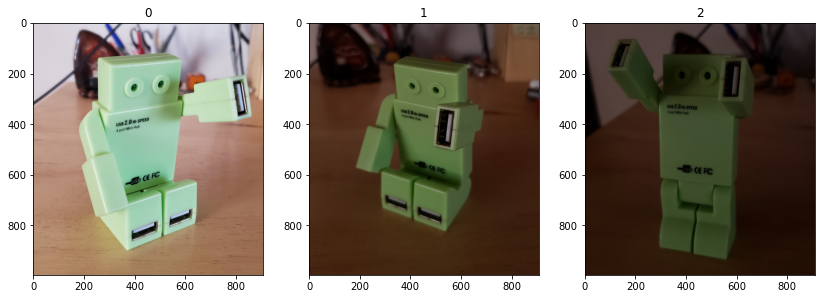

In [30]:
# Se cargan las imagenes a cambiar de coordenadas
imgs = []
imgs.append(cv.imread('tp1_images/CoordCrom_1.png'))
imgs.append(cv.imread('tp1_images/CoordCrom_2.png'))
imgs.append(cv.imread('tp1_images/CoordCrom_3.png'))

# Se convierten a RGB
imgs = [convert_RGB(img) for img in imgs]

plot_images_row(imgs)

In [31]:
def convert_cromatics(img):
    # Sumar valores de RGB en cada posicion
    sum_arr = np.sum(img, axis=2)
    # Eliminar ceros para evitar divisiones por cero
    sum_arr[sum_arr == 0] = 1
    # Calcular imagen en coordenadas cromáticas
    return img / sum_arr[:, :, None]

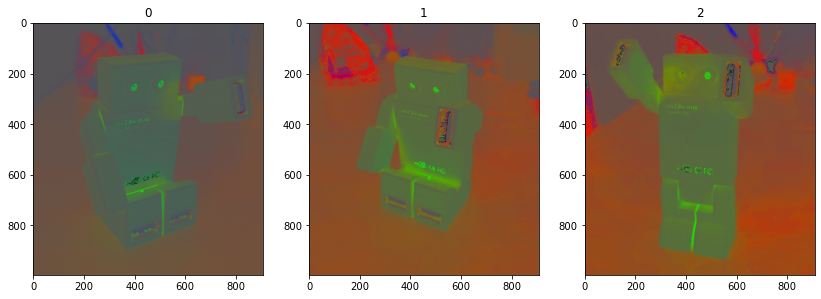

In [32]:
# Transformar a coordenadas cromaticas
imgs_crom = []
for img in imgs:
    imgs_crom.append(convert_cromatics(img))

plot_images_row(imgs_crom)

### Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación

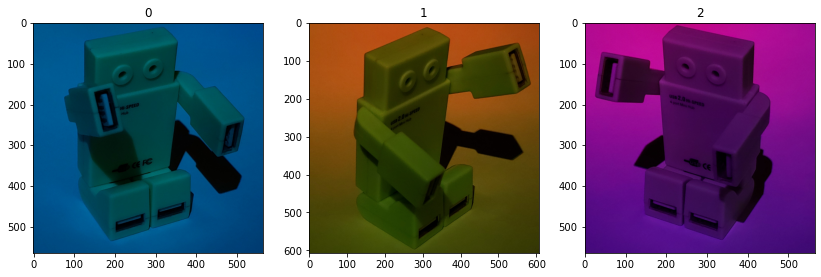

In [17]:
imgs_wp = []
imgs_wp.append(cv.imread('tp1_images/WP_B.png'))
imgs_wp.append(cv.imread('tp1_images/WP_O.png'))
imgs_wp.append(cv.imread('tp1_images/WP_R.png'))

imgs_wp = [convert_RGB(img) for img in imgs_wp]
plot_images_row(imgs_wp)


In [34]:
def convert_white_patch(img):
    # Se obtiene el max de la imagen en cada canal
    max_values = np.max(np.max(img, axis=1), axis=0)
    # Calcular imagen en coordenadas cromáticas
    return (255 / max_values * img).astype(np.uint8)


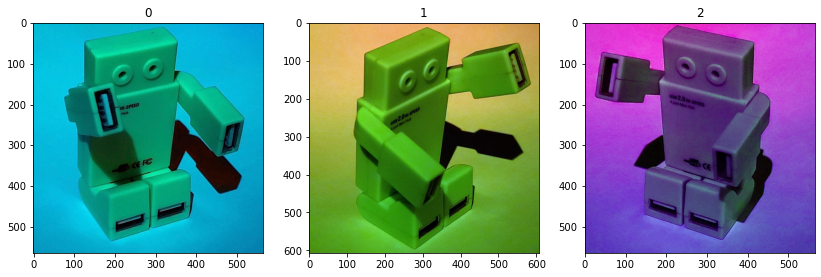

In [35]:
# Transformar a coordenadas cromaticas
imgs_wp_trans = []
for img in imgs_wp:
    imgs_wp_trans.append(convert_white_patch(img))

plot_images_row(imgs_wp_trans)